DS

January 16, 2024

Data Science II

Data set used: https://www.kaggle.com/datasets/tomasmantero/banks-historical-stock-price

# Citibank, Goldman Sachs, TD Bank, Bank of America, HSBC, and JP Morgan Stock Prices from 2008-2020

# Table of Contents
[Introduction](#Introduction) 

[Data](#Data (Shown Above))

[Plot 1: Close Price vs Date](#Plot-1:-Close-Price-vs-Date)

[Plot 2: Trading Volume Vs Date](#Plot-2:-Trading-Volume-Vs-Date)

[Plot 3: Interactive Open & Close vs Date](#Plot-3:-Interactive-Open-&-Close-vs-Date)

[Conclusion](#Conclusion)

[Sources and What I've Learned](#Sources-and-What-I've-Learned)





# Introduction
This data set includes bank's historical stock prices from January 3rd, 2020, to November 19th, 2020.This data sets features metrics such as the Date, High Price, Low Price, Open, Close, Volume, and Adj close. What seems very critical in this data set is the timeframe between 2008-2010, which is when the financial crisis happened—when stock prices of banks tanked. I wanted to analyze how banks not only took the burdens from the financial crisis, but also grew from it, so I plotted the close stock price against the date from 2008-2012. A huge indicator of a bank's stock's performance is how much trading volume there is—do traders, average people, or companies trust that a banks stock is able to make money, or is there a trend of distrust in people swaying away from the stock. I analyzed this in my 2nd plot for 6 multinational banks. In my third plot, I wanted to compare Citi, which did poorly in the financial crisis, HSBC and Goldman Sachs, which regressed but did come back, and TD bank, which did well, using their open and close prices of the day to see how each day went. I made an interactive plot for these banks using plotly, and I have a button for a filter for seeing Open and Close prices.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress
import matplotlib.dates as mdates
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df_BCS = pd.read_csv("BCS.csv")
df_GS  = pd.read_csv("GS.csv")
df_TD  = pd.read_csv("TD.csv")
df_BAC = pd.read_csv("BAC.csv")
df_C   = pd.read_csv("C.csv")
df_HSBC = pd.read_csv("HSBC.csv")
df_JPM = pd.read_csv("JPM.csv")


In [2]:
df_BAC

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
1,2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2,2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
3,2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
4,2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806
...,...,...,...,...,...,...,...
3744,2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,27.580000
3745,2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,27.549999
3746,2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.980000
3747,2020-11-19,27.010000,26.650000,26.930000,26.980000,46423000.0,26.980000


# Data

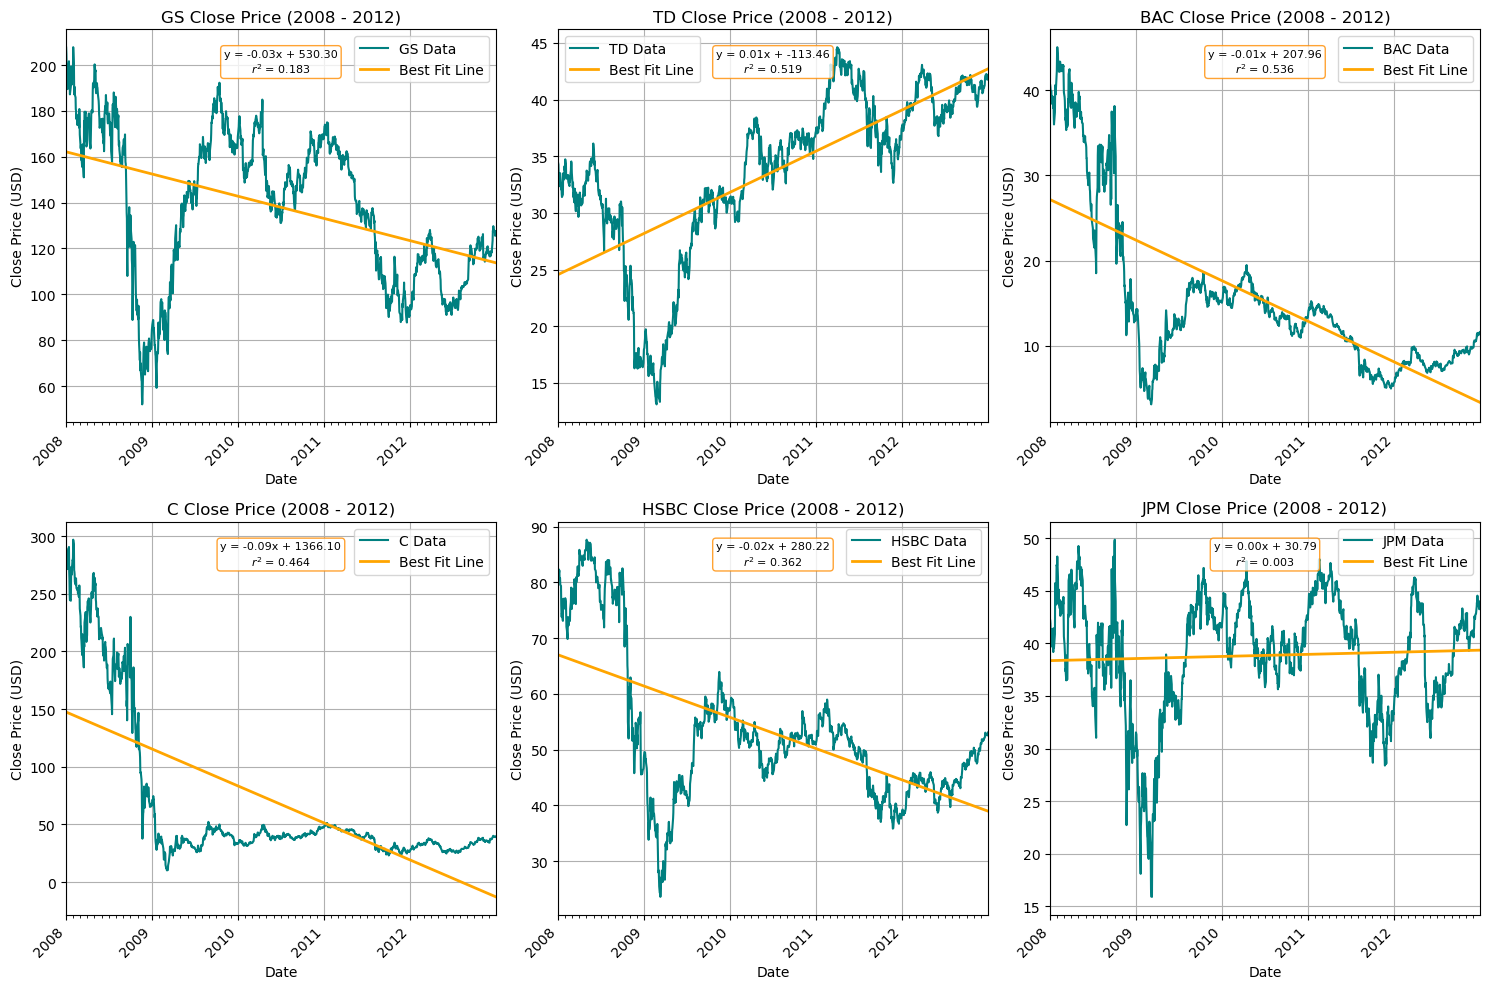

In [3]:
tickers = ["GS", "TD", "BAC", "C", "HSBC", "JPM"]
dfs = {}

for ticker in tickers:
    df = pd.read_csv(f"{ticker}.csv", parse_dates=["Date"], index_col="Date")
    dfs[ticker] = df

start_date = "2008-01-01"
end_date = "2012-12-31"

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=False)
axes = axes.flatten()  

for i, ticker in enumerate(tickers):
    ax = axes[i]
    
    df_filtered = dfs[ticker].loc[start_date : end_date].copy()
    df_filtered.dropna(subset=["Close"], inplace=True)
    
    if df_filtered.empty:
        ax.set_title(f"{ticker}: No data in {start_date} to {end_date}")
        continue

    x = df_filtered.index
    y = df_filtered["Close"].values
    
    x_num = mdates.date2num(x)
    slope, intercept, r_value, p_value, std_err = linregress(x_num, y)
    y_pred = slope * x_num + intercept

    eq_label = (
        f"y = {slope:.2f}x + {intercept:.2f}\n"
        f"$r^2$ = {r_value**2:.3f}"
    )
    
    ax.plot(x, y, color="teal", linewidth=1.5, label=f"{ticker} Data")
    ax.plot(x, y_pred, color="orange", linewidth=2, label="Best Fit Line")
    
    ax.annotate(
        eq_label,
        xy=(0.5, 0.95),
        xycoords="axes fraction",
        ha="center",
        va="top",
        fontsize=8, 
        bbox=dict(
            boxstyle="round,pad=0.3",
            facecolor="white",
            edgecolor="darkorange",
            alpha=0.8
        )
    )

    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%Y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)

    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    ax.set_xlim([datetime(2008, 1, 1), datetime(2012, 12, 31)])
    
    ax.set_title(f"{ticker} Close Price (2008 - 2012)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price (USD)")
    
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# Plot 1: Close Price vs Date

In this plot, I analyzed the Close Price vs Date for a specific amount of time (2008-2012). Although the financial crisis is said to be mainly around the 2008-2010 timeframe, I expanded this to 2012 to visualize if there were improvements over the next two years. A great indicator of how a bank did in the financial crisis is using a best fit line and comparing the slope of each bank, which makes comparisons more relative. With a -.09 slope, Citi did the worst in this timeframe, and TD, although taking a big hit in 2009, grew out of the crisis and did much better right out of it. Goldman Sachs, Bank of America, and HSBC had generally similar slopes, which means they all did relatively poor in the financial crisis, and they all took hits in 2009 which dropped their stock price dramatically. However, they all seem to be growing out of this deficit in 2012, where their stock has been much higher than it was in 2009. JP Morgan is an outlier—there is almost no slope. We see a big hit in 2009, however it grew right out of that within a year, but has been moving volatile since then, and is almost the same stock price as it was in 2008 than it was in 2012, but there was a lot of movement in the stock, which could indicate that is a risky investment, but a great way to make money due to the potential to boom or bust at any given moment. 

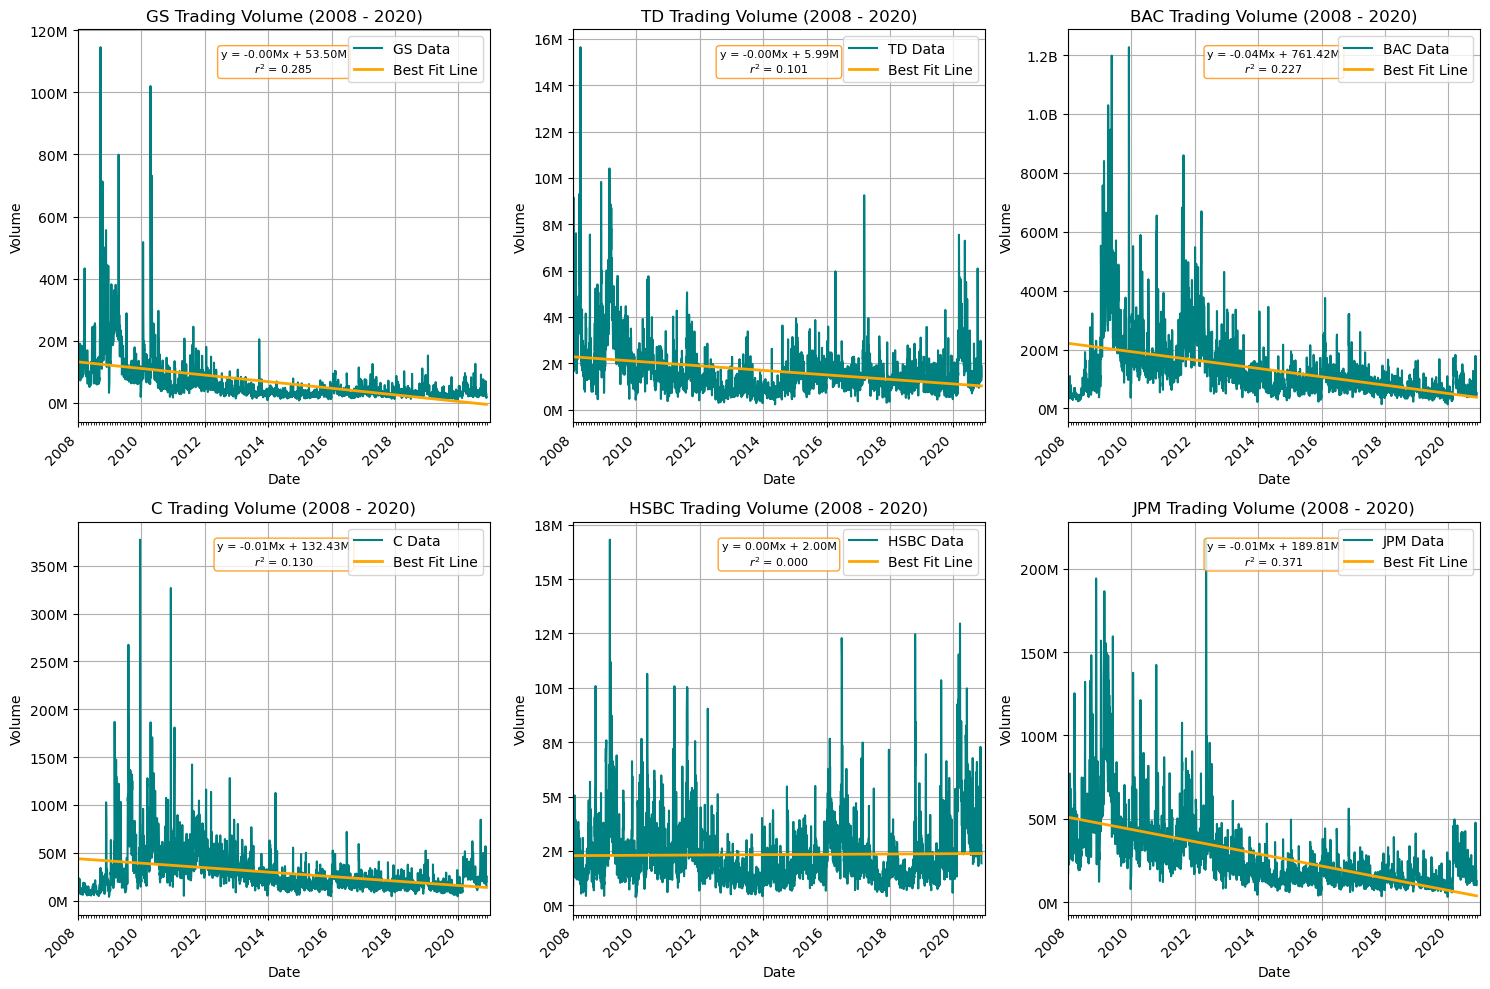

In [4]:
tickers = ["GS", "TD", "BAC", "C", "HSBC", "JPM"]
dfs = {}

for ticker in tickers:
    df = pd.read_csv(f"{ticker}.csv", parse_dates=["Date"], index_col="Date")
    dfs[ticker] = df

start_date = "2008-01-01"
end_date = "2020-12-31"

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=False)
axes = axes.flatten()  

def format_volume(x, p):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    else:
        return f'{x/1e6:.0f}M'

for i, ticker in enumerate(tickers):
    ax = axes[i]
    
    df_filtered = dfs[ticker].loc[start_date : end_date].copy()
    df_filtered.dropna(subset=["Volume"], inplace=True)
    
    if df_filtered.empty:
        ax.set_title(f"{ticker}: No data in {start_date} to {end_date}")
        continue

    x = df_filtered.index
    y = df_filtered["Volume"].values
    
    x_num = mdates.date2num(x)
    slope, intercept, r_value, p_value, std_err = linregress(x_num, y)
    y_pred = slope * x_num + intercept

    # Format the equation in millions
    slope_m = slope / 1e6
    intercept_m = intercept / 1e6
    eq_label = (
        f"y = {slope_m:.2f}Mx + {intercept_m:.2f}M\n"
        f"$r^2$ = {r_value**2:.3f}"
    )
    
    ax.plot(x, y, color="teal", linewidth=1.5, label=f"{ticker} Data")
    ax.plot(x, y_pred, color="orange", linewidth=2, label="Best Fit Line")
    
    ax.annotate(
        eq_label,
        xy=(0.5, 0.95),
        xycoords="axes fraction",
        ha="center",
        va="top",
        fontsize=8, 
        bbox=dict(
            boxstyle="round,pad=0.3",
            facecolor="white",
            edgecolor="darkorange",
            alpha=0.8
        )
    )

    years = mdates.YearLocator(2)
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%Y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_volume))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlim([datetime(2008, 1, 1), datetime(2020, 12, 31)])
    
    ax.set_title(f"{ticker} Trading Volume (2008 - 2020)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# Plot 2: Trading Volume Vs Date
In this plot, I analyzed the trading volume of these banks to show whether trading the stock is considered a good investment—based on how many people actually want to trade the stock. Trading volume is a key metric in financial markets, because it reflects the activity level and liquidity of a stock. High trading volume often indicates significant investor interest and can signal important market events, such as earnings releases, news announcements, or broader market sentiment shifts. Bank of America, Citi, and JP Morgan in these charts show significant trading volume, where BAC almost hit 1.2B of stock value traded in a small time period.  By looking at these volume patterns from 2008-2020, investors can gain deeper insights into market dynamics and the behavior of these banks. Specifically to this plot, it seems that TD and HSBC rarely get traded relatively, but they are consistently displaying some pattern—there aren't any outlier spikes. JP Morgan, Citi, Goldman, and Bank fo America also experienced a large decrease in trading volume throughout these years, which may show that investors are not believing in their stock, or that they haven't done any big releases that have convinced people to invest.

In [5]:
tickers = ["GS", "TD", "BAC", "C", "HSBC", "JPM"]
dfs = {}

for ticker in tickers:
    df = pd.read_csv(f"{ticker}.csv", parse_dates=["Date"])
    dfs[ticker] = df

fig = make_subplots(
    rows=2, 
    cols=3,
    subplot_titles=tuple(f"{ticker} Stock Prices (2008-2020)" for ticker in tickers),
    vertical_spacing=0.15
)

open_color = 'teal'
close_color = '#20B2AA'

for i, ticker in enumerate(tickers):
    row = (i // 3) + 1
    col = (i % 3) + 1
    
    df = dfs[ticker]
    df = df[(df['Date'] >= '2008-01-01') & (df['Date'] <= '2020-12-31')]
    
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df['Open'],
            name=f'{ticker} Open',
            line=dict(color=open_color),
            legendgroup='Open',
            legendgrouptitle_text="Open Prices",
            visible=True
        ),
        row=row,
        col=col
    )
    
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df['Close'],
            name=f'{ticker} Close',
            line=dict(color=close_color),
            legendgroup='Close',
            legendgrouptitle_text="Close Prices",
            visible=True
        ),
        row=row,
        col=col
    )

updatemenus = [
    dict(
        buttons=list([
            dict(
                args=[{"visible": [True, True] * len(tickers)}],
                label="Both",
                method="update"
            ),
            dict(
                args=[{"visible": ([True, False] * len(tickers))}],
                label="Open Only",
                method="update"
            ),
            dict(
                args=[{"visible": ([False, True] * len(tickers))}],
                label="Close Only",
                method="update"
            )
        ]),
        direction="down",
        showactive=True,
        x=0.5,
        xanchor="left",
        y=1.19,
        yanchor="top"
    )
]

fig.update_layout(
    height=800,
    width=1200,
    title_text="Bank Stock Prices: Open vs Close (2008-2020)",
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    updatemenus=updatemenus,
    template="plotly_white",
    margin=dict(t=150)  
)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Price (USD)")

for i in range(len(fig.layout.annotations)):
    if i < 3:  
        fig.layout.annotations[i].update(y=1.05)
    else:  
        fig.layout.annotations[i].update(y=0.45)

fig.show()

# Plot 3: Interactive Open & Close vs Date
In this plot, I made an interactive chart from 2008-2020 comparing the stocks close and open prices. There is an adjustable filter in the top right that allows you to filter out whether you want to see the open or close prices, therefore it makes it easier to make comparisons between both if you'd like to. I used plotly for this plot, and the plot is self explanatory, and when you hover over the line of any chart it shows you the monthly average of each open or close price. It shows how stocks are changing over the month, but also shows if a stock is authentic, such as if prices show growth with one another. For example, look at Citi in November 2008 when it opened ($54.4) vs when it closed ($37.7). This shows that the stock is very volatile, but also look at the TD chart, where stocks rarely move—signifying a steady trend that doesn't vary in that month. 

# Conclusion
   

 The analysis of this dataset shows the critical role of historical stock price data in
 understanding the performance and resilience of multinational banks during and after the financial crisis of 2008. By examining close prices, trading volumes, and open-close comparisons over a broad timeframe, you can make valuable insights into market dynamics. The close price analysis revealed clear trends in how different banks recovered—or struggled—following the financial crisis, with institutions like TD Bank showing remarkable resilience compared to Citi, which faced significant challenges. The trading volume analysis could describe the level of trust and interest in these banks’ stocks, with some institutions, like Bank of America and JP Morgan, demonstrating high investor engagement despite decreasing trading volumes over time. Finally, the interactive comparison of open and close prices provided a clearer look at daily price movements and investor behavior, which offers a tool for both historical and real-time decision-making, and can also give you an additional inference on what volume does to the open and close prices. This exploration is impactful as it not only contextualizes the financial crisis but also sheds light on how trading volume and stock price trends can serve as indicators of market confidence and recovery. 

# Sources and What I've learned

I used ChatGPT 4 for some of the project, but a bulk of the project was coded by Claude 3.5 Sonnet, which is the free model available. I've used Claude a bit in the past over the summer to compare whether it was a good alternative to ChatGPT, but the one standout was how well it codes. In ChatGPT, I'd often have to debug the code or ask it continuous prompts to get it to work. Claude was much more proficient, and the only thinks I really had to change was whether I wanted a title or button higher or lower on the graph, and me just adjusting the code. Also Claude does a much better job of teaching me what its doing, such as changing a title from 1e9 to 1 billion using F strings, or learning how to update my menus as buttons are clicked. Claude spaces the code out really well, and it is something I want to continue as I code in the future, because it makes it much more clear to me. Also, I learned graphing commands such as "orientation" or "direction", which helped me a lot in the process of learning where to put my legends or boxes. 